### HW5

#### part 1

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
BRF_data = np.genfromtxt('/data9/UN3400/data/brf_temp.txt', 
                          delimiter='\t')

In [15]:
BRF_data

array([[ 0.0000000e+00, -1.7270000e+01],
       [ 4.1670000e-02, -1.7850000e+01],
       [ 8.3330000e-02, -1.8420000e+01],
       ...,
       [ 3.6516597e+02, -1.4530000e+01],
       [ 3.6520764e+02, -1.4680000e+01],
       [ 3.6525000e+02, -1.4760000e+01]])

#### part 2

In [20]:
#Going to use the given least squares method: dpre= Acos((2pai*t)/p)+Bcos((2pai*t)/p)+C

t = BRF_data[:, 0]
d_obs = BRF_data[:, 1]

p = 365.25  

X = np.column_stack((
    np.cos(2 * np.pi * t / p),  
    np.sin(2 * np.pi * t / p),  
    np.ones_like(t)           
))

coefficients, residuals, rank, s = np.linalg.lstsq(X, d_obs, rcond=None)
A, B, C = coefficients

d_pre = A * np.cos(2 * np.pi * t / p) + B * np.sin(2 * np.pi * t / p) + C


#### part 3

In [21]:
t = BRF_data[:, 0] 
dpre = BRF_data[:, 1]
P = 365.25
N = len(t)
G = np.zeros((N, 3))
G[:, 0] = np.cos((2 * np.pi * t) / P) 
G[:, 1] = np.sin((2 * np.pi * t) / P) 
G[:, 2] = np.ones(N)
mest, residuals, rank, s = np.linalg.lstsq(G, dpre, rcond=None)
A, B, C = mest
print(f"Model parameters: A = {A}, B = {B}, C = {C}")

Model parameters: A = -11.583299586428742, B = -4.270839428763978, C = 9.041469811928387


In [22]:
GTG_inv = np.linalg.inv(np.matmul(G.T, G))
variance = residuals / (N - 3)
covariance_matrix = GTG_inv * variance
standard_errors = np.sqrt(np.diag(covariance_matrix))
print(f"Standard errors: {standard_errors}")

Standard errors: [0.07569392 0.07681815 0.05392669]


#### part 4

In [23]:
D = np.sqrt(A**2 + B**2)
print(f"Amplitude of the seasonal cycle (D): {D}")

Amplitude of the seasonal cycle (D): 12.345561904394845


#### part 5

In [24]:
phase_shift = np.arctan2(B, A)
t_max = (P * phase_shift) / (2 * np.pi)
if t_max < 0:
    t_max += P
print(f"Time of the peak (t_max): {t_max} days")

Time of the peak (t_max): 203.15942124487728 days


#### part 6

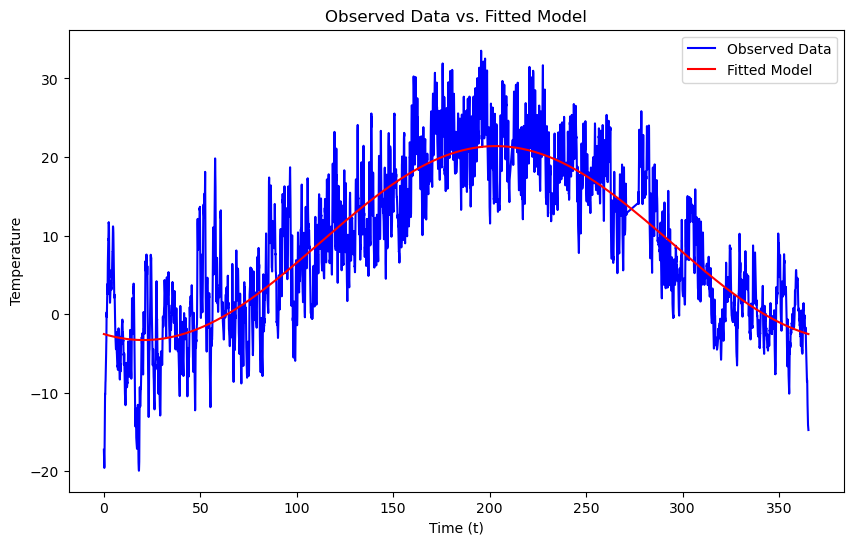

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(t, d_obs, 'b', label='Observed Data')
plt.plot(t, d_pre, 'r', label='Fitted Model')
plt.xlabel('Time (t)')
plt.ylabel('Temperature')
plt.title('Observed Data vs. Fitted Model')
plt.legend()
plt.show()

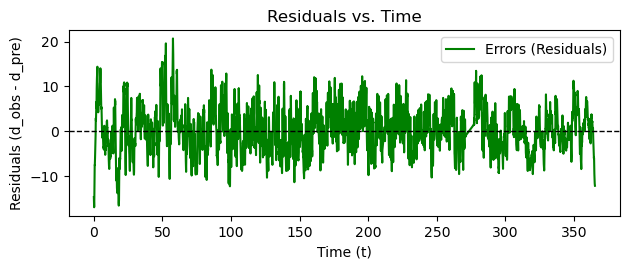

In [29]:
errors = d_obs - d_pre

plt.subplot(2, 1, 2)
plt.plot(t, errors, 'g', label='Errors (Residuals)')
plt.axhline(0, color='black', linestyle='--', linewidth=1) 
plt.xlabel('Time (t)')
plt.ylabel('Residuals (d_obs - d_pre)')
plt.title('Residuals vs. Time')
plt.legend()
plt.tight_layout()
plt.show()